In [1]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 가설검정 및 통계 분석 패키지
from scipy import stats

# 선형모델 formula ( y ~ x1 + x2 + ...)
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

%matplotlib inline

matplotlib.rc('font', family = 'Malgun Gothic')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

## 실습

###  평균검정 (1-SampleTest)

In [35]:
df = pd.DataFrame({'sample': [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})

In [36]:
t_result = stats.ttest_1samp(df, 78)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("1-Sampe t-tesst")
print("t 검정통계량: {}".format(t))
print("p-value: {}".format(p))

1-Sampe t-tesst
t 검정통계량: [3.379]
p-value: [0.008]


※ 결론: 유의수준 5%에서 검정결과가, P-value 값이 0.008이므로 개선활동으로 고객만족도 변화를 시켰다고 할 수 없다.

###  평균검정 (2-SampleTest)

In [38]:
df2 = pd.read_csv("./Data2/2sample_2.csv")
df2.head()

,A,B
0,1.883,1.435
1,1.715,1.572
2,1.799,1.486
3,1.768,1.511
4,1.711,1.457


<AxesSubplot:>

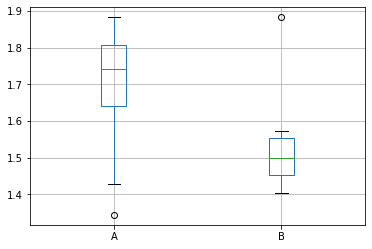

In [39]:
df2.boxplot(['A', 'B'])

In [42]:
t_result = stats.ttest_ind(df2['A'], df2['B'], equal_var = True) # 등분산 있다.

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t검정통계량: {}".format(t))
print("p-value: {}".format(p))

2-Sample t-test
t검정통계량: 1.7
p-value: 0.111


※ p-value가 11%이므로, 유의수준 5%에서 $H_0$가설을 채택한다. A공급자와 B공급자간 모평균에 차이가 있다고 할 수 없다.

###  평균검정 (Paired t-Test)

In [51]:
df = pd.read_csv("./Data2/paired_2.csv", engine = "python")
df.head()
df1, df2 = df[["before"]], df[['after']]

In [52]:
t_result = stats.ttest_rel(df1, df2)

In [53]:
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("Paired t-test")
print('t검정 통계량 = %.3f, pvalue = %.3f' %t_result)

Paired t-test
t검정 통계량 = -2.266, pvalue = 0.050


※ p-value가 5%로 유의확률 5%이내이므로, 관점에 따라 학원가기 전후 차이가 있다고 볼 수 있다. 실제 데이터를 보면 점수에 차이가 있기 때문이다. 따라서 $H_0$을 기각하고 $H_1$을 채택한다.

### 1Proportion Test
**동전 테스트**
- $H_0 : p = 0.5$
- $H_1 : p \ne 0.5$

In [55]:
count = 40
n_obs = 100
value = 0.5

stat, pval = proportions_ztest(count, n_obs, value)

print("1 Proportion test")
print("z: {0:0.3f}".format(stat))
print("p: {0:0.3f}".format(pval))

1 Proportion test
z: -2.041
p: 0.041


※ p-value값이 4%이기에, 5%보다 작기 때문에 $H_1$을 채택한다. 따라서 동전이 정상적이라고 할 수 없다.

### 2ProPortion Test
- $H_0: P_1 = P_2$
- $H_1: P_1 \ne P_2$

In [56]:
count = np.array([14, 5])
nobs = np.array([1200, 1200])

stat, pval = proportions_ztest(count, nobs)

print("1 Proportion test")
print("z: {0:0.3f}".format(stat))
print("p: {0:0.3f}".format(pval))

1 Proportion test
z: 2.073
p: 0.038


※ 유의수준 5%에서 p-value가 3.8%이므로 $H_1$ 가설을 채택해서, 두 회사의 불량률이 같다고 볼 수 없다.

### 카이제곱 검정
- 각 제품에 대해 이미지에 대한 차이가 있겠는가??
- $H_0$: 차이가 없다.
- $H_1$: 차이가 있다.

In [57]:
df = pd.read_csv("./Data2/카이제곱_노트북.csv", engine = "python")
df.head()

,A,B,C,D,E,F
0,18,8,4,4,3,3
1,2,2,1,1,1,25
2,14,14,3,2,3,8
3,5,5,4,3,1,10
4,5,5,9,2,1,2


In [64]:
from scipy.stats import chi2_contingency

# 카이, pvalue, 자유도, 기대치
chi, pval, dof, expected = stats.chi2_contingency(df)

print("chi-square test")
print("chi-square: {0:0.2f}".format(chi))
print("p-value:  {:0.5f}".format(pval))
print("degree of freedom: {}".format(dof))
print("expected value: \n {}".format(expected.round(1)))

chi-square test
chi-square: 95.76
p-value:  0.00000
degree of freedom: 30
expected value: 
 [[10.2  8.4  5.4  3.9  2.  10. ]
 [ 8.2  6.7  4.3  3.2  1.6  8. ]
 [11.2  9.3  5.9  4.3  2.2 11. ]
 [ 7.2  5.9  3.8  2.8  1.4  7. ]
 [ 6.1  5.1  3.2  2.4  1.2  6. ]
 [ 8.2  6.7  4.3  3.2  1.6  8. ]
 [ 5.9  4.8  3.1  2.3  1.1  5.8]]


※ 유의수준 5%에서 p-value는 0%에 가깝기 때문에, $H_0$을 기각하고, $H_1$가설을 채택할 수 있다. 따라서 각 제품에 대해 이미지의 차이가 있다고 할 수 있다.

###  OneWay ANOVA

In [16]:
df = pd.read_csv("./Data/ANOVA.csv", engine = 'python')
df.head()

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a


<AxesSubplot:title={'center':'time'}, xlabel='gangjong'>

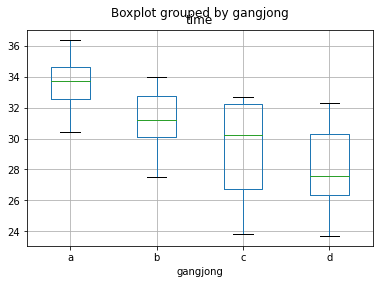

In [19]:
# time을 y축으로, gangjong으로 x축을 가져간다.
df.boxplot(column = "time", by = 'gangjong')

In [22]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [33]:
formula = 'time ~ C(gangjong)' # target ~ 설명변수 / 범주형일 경우 C를 쓴다.

lm = ols(formula, df).fit()
print(anova_lm(lm))

               df      sum_sq    mean_sq         F    PR(>F)
C(gangjong)   3.0  104.603333  34.867778  4.171868  0.019013
Residual     20.0  167.156667   8.357833       NaN       NaN


- df: 자유도 / sum_sq = 제곱합 / mean_sq: MSE, / F: F분포값 / PR: p-value

※ 결론: P값이 0.019이기에 $H_1$을 채택한다. 따라서 강종별로 2차 정련 시간에 차이가 있다고 할 수 있다.

## 상관분석

In [80]:
df = pd.read_csv("./Data/correaltion.csv", engine = 'python')
df

,strength,temp,Quantity,b_time,Oven_TMP
0,37.6,14,120.790646,0.798922,307.106574
1,38.6,15,99.643155,0.849020,318.178850
2,37.2,14,115.102395,0.816163,339.715122
3,36.4,16,114.640504,0.758266,341.174398
4,38.6,17,141.266536,0.815894,335.904402
...,...,...,...,...,...
81,29.9,32,79.594637,0.610326,306.818784
82,30.0,31,82.223257,0.628432,292.587401
83,28.7,33,100.365080,0.610100,307.808118
84,30.0,28,81.398413,0.614772,350.851516


In [85]:
strength = df["strength"]
temp = df["temp"]

In [68]:
strength.head()

0    37.6
1    38.6
2    37.2
3    36.4
4    38.6
Name: strength, dtype: float64

<AxesSubplot:xlabel='temp', ylabel='strength'>

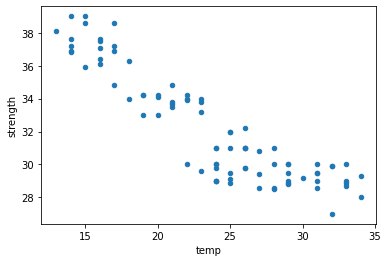

In [87]:
df.plot.scatter(x = "temp", y = "strength")

In [84]:
corr, pval = stats.pearsonr(strength, Temp)

※ 강도와 온도는 음의 상관관계를 가지고 있다. 따라서 온도가 올라갈수록 강도는 낮아진다.

# 회귀분석

In [89]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 가설검정 및 통계 분석 패키지
from scipy import stats

# 선형모델 formula ( y ~ x1 + x2 + ...)
from statsmodels.api import qqplot, add_constant

from statsmodels.stats.proportion import proportions_ztest
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

%matplotlib inline

matplotlib.rc('font', family = 'Malgun Gothic')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

## 데이터 구성

In [91]:
df_raw = pd.read_csv("./Data/correaltion.csv")
df_raw.head().round(3)

,strength,temp,Quantity,b_time,Oven_TMP
0,37.6,14,120.791,0.799,307.107
1,38.6,15,99.643,0.849,318.179
2,37.2,14,115.102,0.816,339.715
3,36.4,16,114.641,0.758,341.174
4,38.6,17,141.267,0.816,335.904


## 그래프(산점도) 분석

<AxesSubplot:xlabel='strength', ylabel='b_time'>

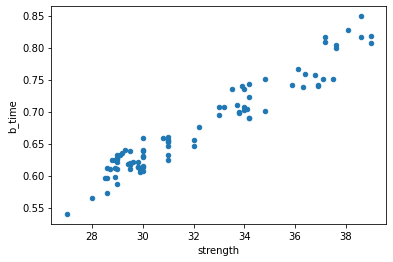

In [92]:
df_raw.plot.scatter(x = "strength", y = 'b_time')

In [93]:
df_raw.corr(method="pearson").round(3)

,strength,temp,Quantity,b_time,Oven_TMP
strength,1.000,-0.899,0.703,0.966,0.037
temp,-0.899,1.000,-0.639,-0.873,-0.064
Quantity,0.703,-0.639,1.000,0.690,-0.151
b_time,0.966,-0.873,0.690,1.000,0.099
Oven_TMP,0.037,-0.064,-0.151,0.099,1.000


※ strength와 b_time관의 양의 상관관계가 0.966으로 강하게 있음을 확인할 수 있다.

## 회귀모델 생성

In [97]:
formula = "strength ~ b_time"
reg_model =smf.ols(formula, df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1169.
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           4.60e-51
Time:                        18:43:48   Log-Likelihood:                -107.75
No. Observations:                  86   AIC:                             219.5
Df Residuals:                      84   BIC:                             224.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1034      0.885      2.377      0.0

- 분석자료수: 86, 잔차 자유도: 12, 모델 자유도: 1 
- R-squared값이 0.933으로 설명력이 매우 크기에 b_time으로 strength를 93.3% 설명할 수 있다.
- 분산 분석결과  '4.60e-51' 0.05보다 월등히 작으므로 회귀모델로서 유의하다.
- 회귀식에서는 절편의 유의성은 검토하지 않지만, 5%미만이며, b_time의 p값이 0.05보다 작으므로 $H_1$채택. 따라서 유의관계에 있다고 할 수 있다.

## 오차의 기본가정(등분산성/독립성)

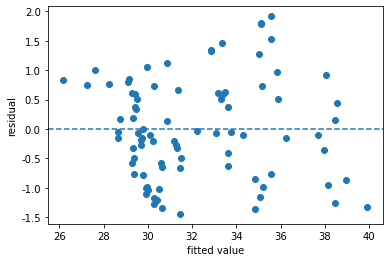

In [102]:
# 잔차의 등분산성
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

# 잔차가 y=0을 기준으로 랜덤하게 산포되어있으므로 등분산성과 독립성을 만족한다.

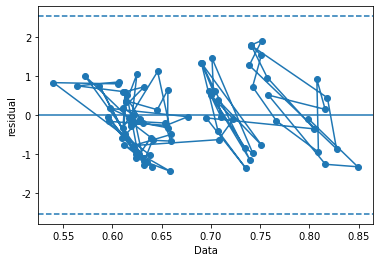

In [101]:
# 잔차의 독립성
plt.plot(df_raw["b_time"], reg_result.resid, marker = "o")
plt.xlabel("Data")
plt.ylabel("residual")

plt.axhline(y = 0, linestyle = "-")
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = "--")
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = "--")

# 해석 의문

NormaltestResult(statistic=5.137339293334132, pvalue=0.0766374324997326)

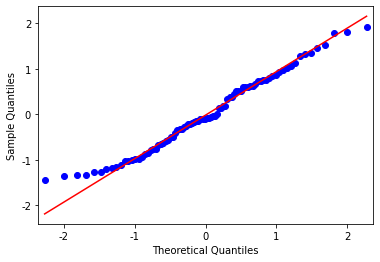

In [103]:
qqplot(reg_result.resid, line="q")

from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis=0)

- 정규분포 직선(적색 선)을 중심으로 분포하고, 검정통계량이 귀무가설을 채택하므로 정규분포를 따른다고 할 수 있다.

## 결론도출
### 최종회귀식
$\hat{y} = 2.1034 + 44.5520 * \text{b-time}$

baking시간이 0.1씩 증가할 때마다 강도는 4.45씩 증가